MemoryError: Unable to allocate 3.02 GiB for an array with shape (33562, 32238, 3) and data type bool

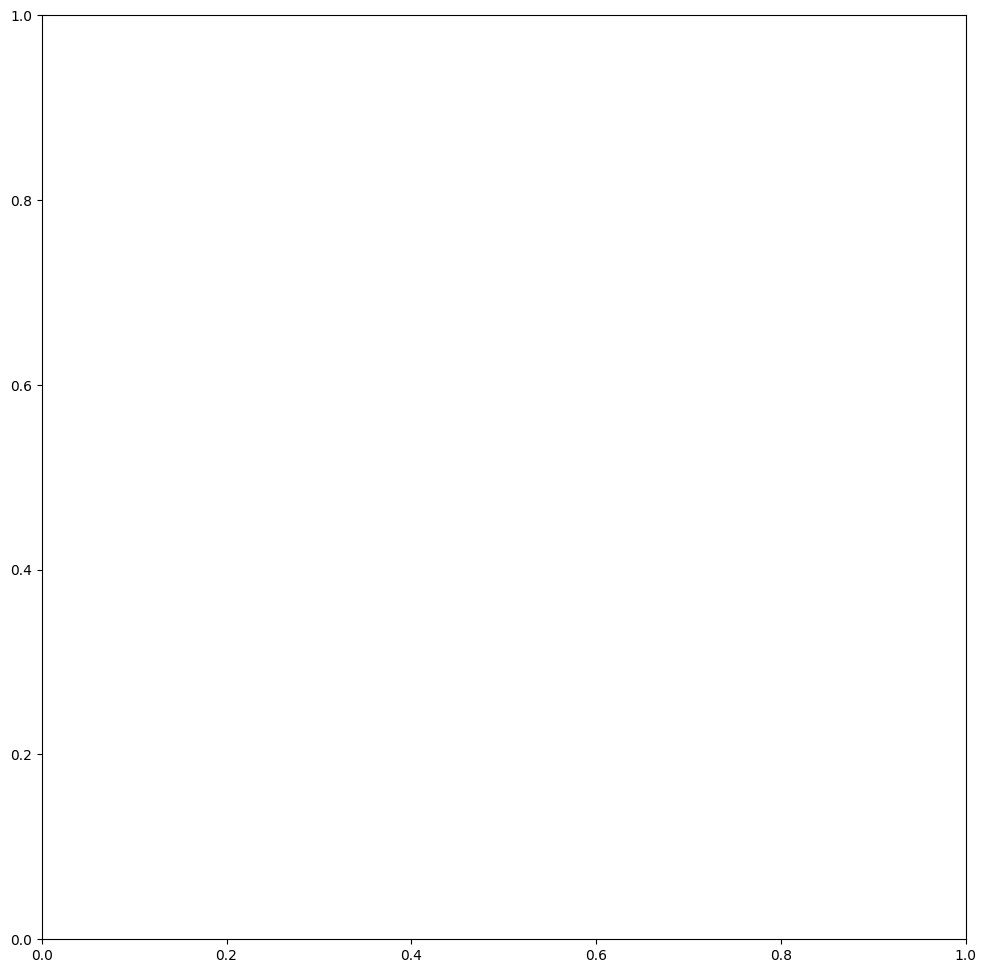

In [2]:
import rasterio
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def read_yolo_txt(txt_file):
    """
    读取 YOLO 坐标文件，返回一个包含检测框信息的列表。
    """
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f:
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            boxes.append((class_id, x_center, y_center, width, height))
    return boxes

def plot_boxes_on_image(image_path, txt_file, output_image):
    """
    在图像上绘制检测框并保存结果。
    """
    # 读取图像
    with rasterio.open(image_path) as src:
        image = src.read([1, 2, 3])  # 读取前三个波段
        image = image.transpose(1, 2, 0)  # 转换维度以适应 matplotlib

    # 读取 YOLO 坐标
    boxes = read_yolo_txt(txt_file)

    # 获取图像尺寸
    height, width, _ = image.shape

    # 绘制图像
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image)

    # 绘制检测框
    for box in boxes:
        class_id, x_center, y_center, box_width, box_height = box
        # 将归一化坐标转换为实际坐标
        x_center *= width
        y_center *= height
        box_width *= width
        box_height *= height
        # 计算左上角坐标
        x_min = x_center - (box_width / 2)
        y_min = y_center - (box_height / 2)
        # 绘制矩形框
        rect = patches.Rectangle((x_min, y_min), box_width, box_height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        # 可选：添加类别标签
        ax.text(x_min, y_min - 10, f'Class {int(class_id)}', color='red', fontsize=12, backgroundcolor='white')

    # 隐藏坐标轴
    ax.axis('off')

    # 保存结果图像
    plt.savefig(output_image, bbox_inches='tight')
    plt.show()

# 示例文件路径
image_path = 'tif_path.tif'
txt_file = 'yolo_label_path.txt'
output_image = 'output_kuang.png'

# 执行函数
plot_boxes_on_image(image_path, txt_file, output_image)